In [1]:
import numpy
import PIL
from PIL import Image

In [2]:
import pandas as pd
import tflearn
import tensorflow as tf
# Remove regular python warnings
import warnings
warnings.filterwarnings('ignore')
# Remove TensorFlow warnings
tf.logging.set_verbosity(tf.logging.ERROR)
import matplotlib.pyplot as plt
%matplotlib inline

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape

(19906, 2)

In [7]:
train['ID'][0]

'377.jpg'

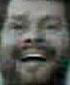

In [9]:
img = Image.open('Train/'+train['ID'][0])
img

In [19]:
path2 = 'Train2'
for i in range(train.shape[0]):
    img = Image.open('Train/'+train['ID'][i]).convert('L')
    img = img.resize((28, 28), Image.ANTIALIAS)
    img.save(path2+'/'+train['ID'][i])

In [21]:
img = Image.open('Train2/'+train['ID'][0])
img

In [22]:
ar = numpy.array(img)

In [23]:
path2 = 'Test2'
for i in range(test.shape[0]):
    img = Image.open('Test/'+test['ID'][i]).convert('L')
    img = img.resize((28, 28), Image.ANTIALIAS)
    img.save(path2+'/'+test['ID'][i])

In [25]:
ar = ar.flatten()
ar.shape

(784,)

In [26]:
ar

array([ 42,  46,  36,  79, 141, 158, 162, 162, 164, 156, 144, 136, 134,
       134, 133, 133, 127, 122, 112, 101,  93,  84,  68,  53,  50,  35,
        12,   5,  54,  59,  56, 103, 158, 169, 175, 180, 158, 162, 165,
       162, 155, 147, 142, 141, 145, 145, 140, 132, 125, 120, 111, 102,
        77,  57,  29,  22,  57,  65,  77, 133, 173, 162, 156, 156, 168,
       167, 166, 165, 163, 157, 150, 145, 140, 144, 144, 137, 130, 124,
       116, 109,  98,  72,  39,  31,  52,  59,  83, 151, 190, 178, 177,
       180, 182, 164, 146, 144, 155, 163, 159, 151, 159, 160, 155, 147,
       139, 130, 118, 106, 102,  74,  39,  30,  64,  62,  81, 140, 167,
       157, 164, 166, 152, 141, 132, 136, 151, 163, 163, 158, 169, 159,
       144, 133, 130, 128, 117, 105,  96,  74,  42,  30,  55,  61,  88,
       137, 140, 113, 106,  94,  94, 104, 121, 137, 147, 151, 149, 147,
       124, 111,  93,  84,  89,  97,  93,  83,  85,  75,  48,  29,  32,
        57, 104, 153, 144, 115, 111,  94,  81,  89, 105, 123, 13

In [27]:
imTrain = pd.DataFrame({
    "Class": train['Class']
})

In [37]:
#print(train.shape[0])
imgAr = []
for i in range(train.shape[0]):
    imgAr.append(numpy.array(Image.open('Train2/'+train['ID'][i])).flatten())  

In [39]:
imgAr = numpy.array(imgAr)

In [40]:
for i in range(784):
    nameId = 'pixel'+str(i)
    imTrain[nameId] = imgAr[:,i]

In [41]:
imTrain[:2]

,Class,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,MIDDLE,42,46,36,79,141,158,162,162,164,...,24,15,4,9,18,14,22,35,89,137
1,YOUNG,27,39,42,31,25,29,29,23,43,...,66,66,73,72,67,71,73,65,54,47


In [42]:
imTrain['Class'] = imTrain['Class'].map({'YOUNG': 0, 'MIDDLE': 1, 'OLD': 2})

In [43]:
imTrain[:4]

,Class,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,42,46,36,79,141,158,162,162,164,...,24,15,4,9,18,14,22,35,89,137
1,0,27,39,42,31,25,29,29,23,43,...,66,66,73,72,67,71,73,65,54,47
2,1,38,48,37,101,209,193,199,186,235,...,68,64,63,63,62,61,61,63,66,70
3,0,20,21,21,19,18,20,21,21,19,...,158,209,237,151,54,46,68,74,74,55


In [45]:
imTest = pd.DataFrame()

In [47]:
imgAr = []
for i in range(test.shape[0]):
    imgAr.append(numpy.array(Image.open('Test2/'+test['ID'][i])).flatten())

In [48]:
imgAr = numpy.array(imgAr)

In [49]:
for i in range(784):
    nameId = 'pixel'+str(i)
    imTest[nameId] = imgAr[:,i]

In [50]:
print(imTrain.shape)
print(imTest.shape)

(19906, 785)
(6636, 784)


In [52]:
imageLabel = imTrain.ix[:, 0:1]
imageTrain = imTrain.ix[:, 1:]

In [53]:
print(imageLabel.shape)
print(imageTrain.shape)
print(imTest.shape)

(19906, 1)
(19906, 784)
(6636, 784)


In [54]:
norm_dataTrain = (imageTrain - imageTrain.mean())/imageTrain.std()
norm_dataTrain = norm_dataTrain.fillna(0)

norm_dataTest = (imTest - imTest.mean())/imTest.std()
norm_dataTest = norm_dataTest.fillna(0)

In [57]:
norm_labels = []
for value in imageLabel.iterrows():
    new_label = numpy.zeros(3)
    new_label[value[1]]=1
    norm_labels.append(new_label)
norm_labels = numpy.array(norm_labels)

In [73]:
print(imageLabel.ix[9:9,0:1])
print(norm_labels[9])

   Class
9      2
[ 0.  0.  1.]


In [59]:
train = norm_dataTrain.as_matrix()
test = norm_dataTest.as_matrix()

In [61]:
print(train.shape)
print(test.shape)
print(norm_labels.shape)

(19906, 784)
(6636, 784)
(19906, 3)


In [63]:
net = tflearn.input_data(shape=[None, 784])
net = tflearn.fully_connected(net, 128, activation='ReLu')
# add a second hidden layer
net = tflearn.fully_connected(net, 64, activation='ReLu')
# third layer, better going deeper than wider
net = tflearn.fully_connected(net, 32, activation='ReLu')

In [64]:
net = tflearn.fully_connected(net, 3, activation='softmax')

In [65]:
net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
model = tflearn.DNN(net)

In [66]:
model.fit(train, norm_labels,show_metric=True,validation_set=0.1,batch_size=100, n_epoch=50)

Training Step: 8999  | total loss: 0.85312 | time: 1.500s
| SGD | epoch: 050 | loss: 0.85312 - acc: 0.6146 -- iter: 17900/17915
Training Step: 9000  | total loss: 0.85312 | time: 2.513s
| SGD | epoch: 050 | loss: 0.85312 - acc: 0.6146 | val_loss: 0.84352 - val_acc: 0.6233 -- iter: 17915/17915
--


In [80]:
#ids=[]
predictions=[]
pred=model.predict(test)
for i, values in enumerate(pred):
    pred_digit=values.index(max(values))
    #ids.append(i+1)
    predictions.append(pred_digit)

In [85]:
predictions
dic = {0: 'YOUNG', 1: 'MIDDLE', 2: 'OLD'}
#predictions = list(map(dict.get, predictions))

In [86]:
predictions2 = [dic[x] for x in predictions]

In [87]:
predictions2[:4]

['MIDDLE', 'YOUNG', 'MIDDLE', 'YOUNG']

In [88]:
test = pd.read_csv('test.csv')
sub = pd.DataFrame({
    "Class": predictions2,
    "ID": test['ID']
})


In [89]:
sub.to_csv("submission.csv", index=False)